In [1]:
from draw3d import *

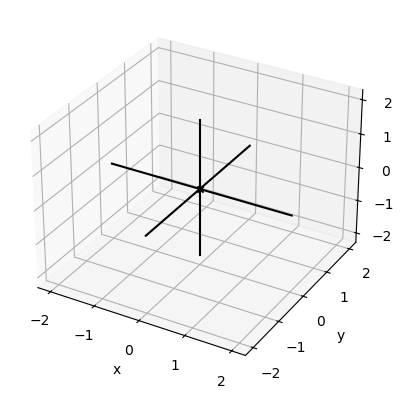

In [2]:
draw3d()

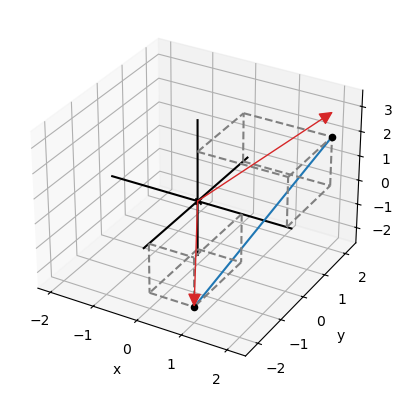

In [3]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,3)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

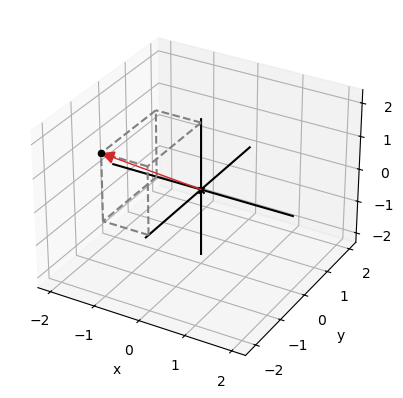

In [4]:
draw3d(
    Points3D((-1,-2,2)),
    Arrow3D((-1,-2,2)),
    Box3D(-1,-2,2)
)

## mini-program 3.2

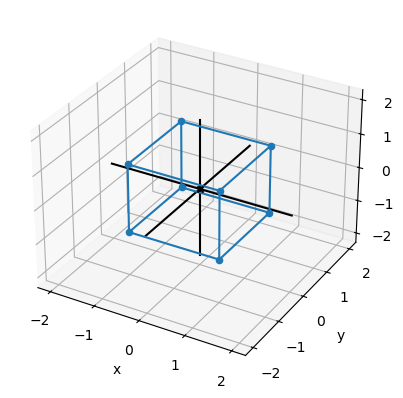

In [6]:
pm1 = [1,-1]
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
edges = [((x,y,1),(x,y,-1)) for x in pm1 for y in pm1] +\
[((x,1,z),(x,-1,z)) for x in pm1 for z in pm1] +\
[((1,y,z),(-1,y,z)) for y in pm1 for z in pm1]

draw3d(
    Points3D(*vertices, color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [7]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [8]:
def add(*vectors):
    return tuple(map(sum, zip(*vectors)))

In [9]:
def length(vector):
    return sqrt(sum([coord ** 2 for coord in vector]))

## mini-program 3.3

In [11]:
add((4,0,3),(-1,0,1))

(3, 0, 4)

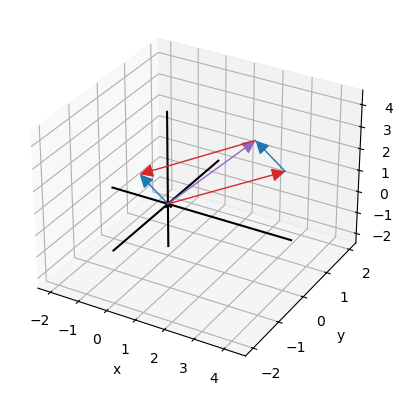

In [12]:

draw3d(
    Arrow3D((4,0,3), color=red),
    Arrow3D((-1,0,1), color=blue),
    Arrow3D((3,0,4), color=purple),
    Arrow3D((3,0,4),(4,0,3),color=blue),
    Arrow3D((-1,0,1),(3,0,4),color=red)
)

## mini-program 3.5

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


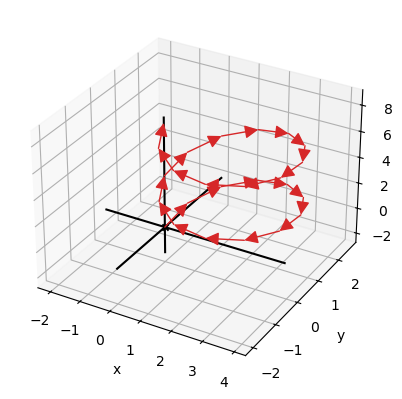

In [14]:
from math import sin,cos,pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]

running_sum = (0,0,0)
arrows = []
for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

In [15]:
def scale(scalar, vector):
    return tuple(scalar*coord for coord in vector)

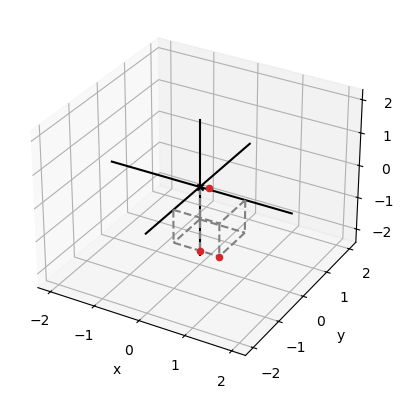

In [16]:
draw3d(
    Points3D((1,-1,-1), (0,0,-2), (1/2, -1/2, 1/2), color=red),
    Box3D(1,-1,-1),
    Box3D(0,0,-2)
)

In [17]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1, max_coord):
        for y in range(1, x+1):
            for z in range(1, y+1):
                if length((x, y, z)).is_integer():
                    yield (x,y,z)

In [18]:
list(vectors_with_whole_number_length())

[(2, 2, 1),
 (4, 4, 2),
 (6, 3, 2),
 (6, 6, 3),
 (7, 4, 4),
 (7, 6, 6),
 (8, 4, 1),
 (8, 8, 4),
 (9, 6, 2),
 (10, 10, 5),
 (11, 10, 2),
 (12, 4, 3),
 (12, 6, 4),
 (12, 9, 8),
 (12, 12, 1),
 (12, 12, 6),
 (14, 5, 2),
 (14, 8, 8),
 (14, 12, 12),
 (14, 14, 7),
 (15, 10, 6),
 (16, 8, 2),
 (16, 11, 8),
 (16, 13, 4),
 (16, 15, 12),
 (16, 16, 8),
 (17, 6, 6),
 (18, 6, 1),
 (18, 9, 6),
 (18, 12, 4),
 (18, 13, 6),
 (18, 14, 3),
 (18, 18, 9),
 (19, 8, 4),
 (20, 5, 4),
 (20, 12, 9),
 (20, 20, 10),
 (20, 20, 17),
 (21, 12, 12),
 (21, 16, 12),
 (21, 18, 14),
 (21, 18, 18),
 (22, 6, 3),
 (22, 14, 7),
 (22, 20, 4),
 (22, 21, 6),
 (22, 22, 11),
 (23, 10, 10),
 (23, 14, 2),
 (24, 8, 6),
 (24, 12, 3),
 (24, 12, 8),
 (24, 12, 11),
 (24, 16, 3),
 (24, 18, 16),
 (24, 24, 2),
 (24, 24, 12),
 (24, 24, 23),
 (25, 10, 2),
 (25, 20, 8),
 (26, 7, 2),
 (26, 18, 15),
 (26, 22, 19),
 (26, 26, 13),
 (27, 14, 6),
 (27, 18, 6),
 (27, 24, 8),
 (28, 10, 4),
 (28, 16, 7),
 (28, 16, 16),
 (28, 17, 4),
 (28, 21, 12),
 (28,

In [19]:
length((-1,-1,2))

2.449489742783178

## Computing the dot product

In [21]:
def dot(u, v):
    return sum(coord1*coord2 for coord1, coord2 in zip(u, v))

In [22]:
dot((1,0), (0,2))

0

In [23]:
dot((3,4), (2,3))

18

In [24]:
dot((0,3,0), (0,0,5))

0

In [25]:
dot(scale(2, (3,4)), (2,3))

36

In [26]:
dot((3,4), scale(2,(2,3)))

36

In [27]:
from vectors import to_cartesian
from random import random
from math import pi

def random_vector_of_length(l):
    return to_cartesian((l, 2*pi*random()))

pairs = [(random_vector_of_length(3), random_vector_of_length(7)) for i in range(0, 3)]

for u, v in pairs:
    print(f'u={u}, v={v}')
    print(f'length of u: {length(u): f}, length of v: {length(v): f}, dot product: {dot(u, v): f}')

u=(0.2445649180650759, 2.9900147158252954), v=(6.742102921473482, -1.8825642608577113)
length of u:  3.000000, length of v:  7.000000, dot product: -3.980013
u=(2.378362461388803, 1.8284944632830018), v=(-5.126566938373628, -4.766372984395414)
length of u:  3.000000, length of v:  7.000000, dot product: -20.908121
u=(2.3345387602015277, -1.8841254674561123), v=(-1.828944934857618, 6.756845449265409)
length of u:  3.000000, length of v:  7.000000, dot product: -17.000487


In [28]:
3.61*1.44*cos(101.3*pi/180)

-1.0186064362303022

In [29]:
from vectors import to_polar
to_polar((3,4))

(5.0, 0.9272952180016122)

In [30]:
from math import atan2
atan2(4,3)

0.9272952180016122

In [31]:
to_polar((3,4))[1] - to_polar((4,3))[1]

0.2837941092083278

In [32]:
from math import acos
acos(24/25)

0.283794109208328

## The cross product: measuring oriented area

In [101]:
def cross(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return (uy*vz - uz*vy,  uz*vx - ux*vz, ux*vy - uy*vx)

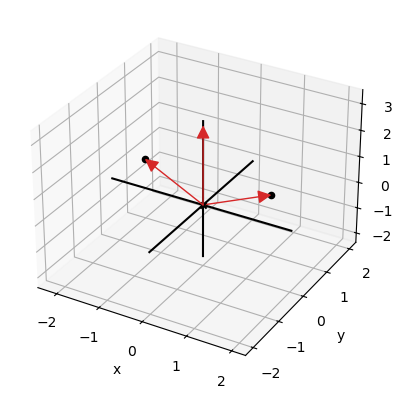

In [35]:
draw3d(
    Points3D((1,1,0), (-2, 1, 0)),
    Arrow3D((1,1,0)),
    Arrow3D((-2,1,0)),
    Arrow3D(cross((1,1,0), (-2, 1, 0)))
)

In [103]:
cross((0,0,1),(1,2,3))

(-2, 1, 0)

In [105]:
cross((0,0,1),(-1,-1,0))

(1, -1, 0)

In [145]:
cross((-1,-1,0),(0,0,1))

(-1, 1, 0)

In [107]:
cross((0,0,1),(1,-1,5))

(1, 1, 0)

In [137]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0),(0,0,-1)],
    [(-1,0,0),(0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0),(0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0),  (0,0,-1), (0,-1,0)]
]

In [ ]:
octahedron1 = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,-1,0), (0,0,1)],
    [(1,0,0), (0,1,0), (0,0,-1)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0),(0,1,0), (0,0,1)],
    [(-1,0,0), (0,-1,0),(0,0,1)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,-1)]
]

In [40]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [41]:
def component(v, direction):
    return dot(v,direction)/length(direction)

In [42]:
def vector_to_2d(v):
    return(component(v, (1,0,0)), component(v, (0,1,0)))

In [43]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [44]:
blues = matplotlib.colormaps.get_cmap('Blues')

In [45]:
def unit(v):
    return scale(1./length(v), v)

In [115]:
def normal(face):
    return (cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [117]:
from vectors import *
from draw2d import *

In [141]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit_normal, unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)

    draw2d(*polygons, axes=False, origin=False, grid=None)

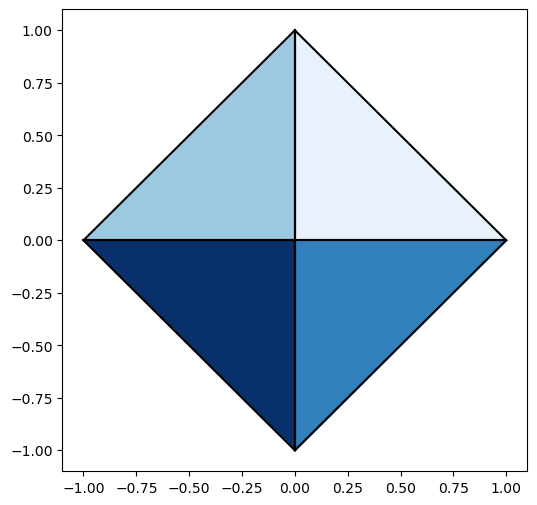

In [143]:
render(octahedron, color_map=matplotlib.colormaps.get_cmap('Blues'), lines=black)

## mini-program 3.27

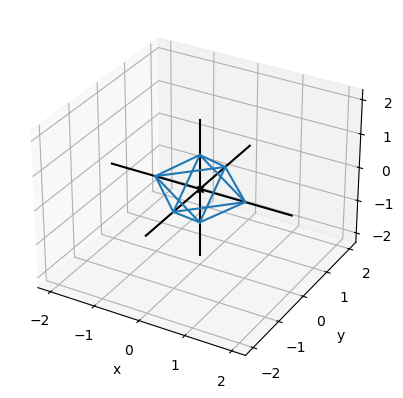

In [154]:
top=(0,0,1)
bottom=(0,0,-1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0), (0,-1,0)]
edges = [Segment3D(top, p) for p in xy_plane] +\
[Segment3D(bottom, p) for p in xy_plane] +\
[Segment3D(xy_plane[i], xy_plane[(i+1)%4]) for i in range(0,4)]
draw3d(
    *edges
)

In [170]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0, len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([newface for face in faces for newface in split(face)], depth-1)

def sphere_approx(n):
    return rec_split(octahedron, n)

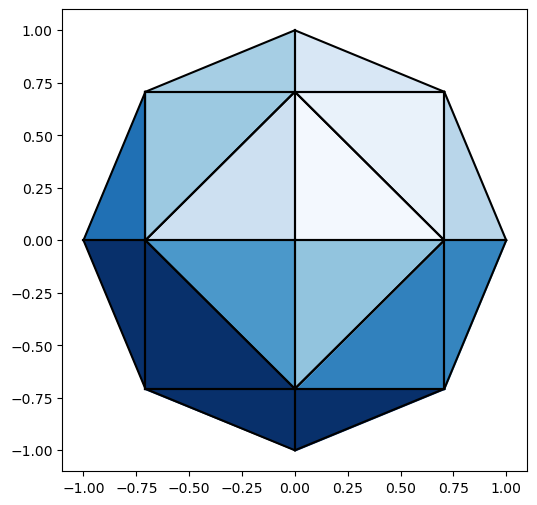

In [194]:
render(sphere_approx(1), lines='k')